[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mahmouddraz/xai/blob/main/notebooks/shap/shap_exercise.ipynb)

# Clone The workshop **Repo**

In [1]:
!git clone https://github.com/mahmouddraz/xai.git

Cloning into 'xai'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 469 (delta 138), reused 117 (delta 58), pack-reused 251
Receiving objects: 100% (469/469), 106.67 MiB | 23.28 MiB/s, done.
Resolving deltas: 100% (264/264), done.
Checking out files: 100% (62/62), done.


# Imports 

In [ ]:
! pip install shap

In [3]:
import tensorflow as tf 
import tensorflow_datasets as tfds

import shap 
from sklearn.metrics import accuracy_score

import pickle 
import numpy as np

from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

# SHAP for Tabular data - Strole data

## Load datasets

In [72]:
X_train = pickle.load(open('/content/xai/pretrained_models/rf_stroke/rf_stroke_X_train.pickle', 'rb'))
X_test = pickle.load(open('/content/xai/pretrained_models/rf_stroke/rf_stroke_X_test.pickle', 'rb'))
y_train = pickle.load(open('/content/xai/pretrained_models/rf_stroke/rf_stroke_X_train.pickle', 'rb'))
y_test= pickle.load(open('/content/xai/pretrained_models/rf_stroke/rf_stroke_y_test.pickle', 'rb'))

In [42]:
X_test['id'] = 0

## Load model-- RandomForestClassfier model

In [ ]:
f = open('/content/xai/pretrained_models/rf_stroke/rf_stroke.pickle', 'rb')
model =pickle.load(f)

## Model evaluation

In [62]:
y_pred = model.predict(X_test)

In [65]:
# evaluate model
print('Accuracy Score:')
print(str(round(accuracy_score(y_test, y_pred), 2) * 100) + "%")

Accuracy Score:
94.0%


## Create explainer with SHAP for the RF model

In [66]:
#### CODE HERE  ### 
explainer = shap.TreeExplainer(model)

## Calculate the shap_values for the features 

In [70]:
### CODE HERE ### 
shap_values = explainer.shap_values(X_test)

## Visualize the explaintions

### Summary plot

In [102]:
## CODE HERE 



AttributeError: ignored

### Force Plot

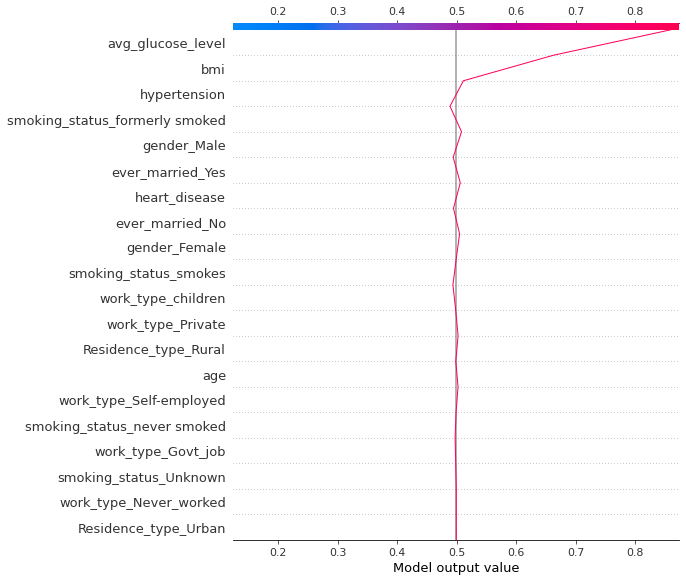

In [106]:
shap.initjs()
## CODE HERE ## 


### Decision plot

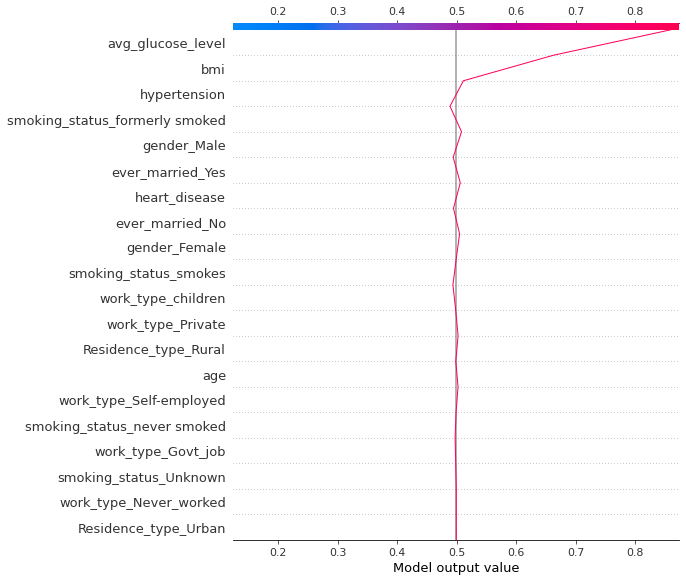

In [91]:
## CODE HERE ## 


### Partial dependence plot

In [ ]:
## CODE HER ### 

# Cats vs Dogs 

## Load model

In [ ]:
model_cnn = tf.keras.models.load_model("/content/xai/pretrained_models/dnn_model.h5")
model_cnn.summary()

## Load data

In [120]:
tfds.disable_progress_bar()
def normalize(image, label):

  # cast to float
  image = tf.cast(image, tf.float32)
  # normalize the pixel values
  image = image / 255
  # resize to 300 x 300
  image = tf.image.resize(image, (300,300))

  return image, label


def get_data():

     setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

     train_data, info = tfds.load('cats_vs_dogs', split='train[:80%]', as_supervised=True, with_info=True)
     validation_data = tfds.load('cats_vs_dogs', split='train[80%:90%]', as_supervised=True)
     test_data = tfds.load('cats_vs_dogs', split='train[-10%:]', as_supervised=True)

     train_data = train_data.map(normalize)
     validation_data = validation_data.map(normalize)
     test_data = test_data.map(normalize)

     train_batches = train_data.batch(32)
     test_batches = test_data.batch(1)
     validation_batches = validation_data.batch(32)

     return train_data, test_data, validation_data, train_batches, test_batches, validation_batches, info

In [122]:
# get data
train_data, test_data, validation_data, train_batches, test_batches, validation_batches, info = get_data()

In [ ]:
tfds.show_examples(train_data, info)

## Test the model

In [ ]:
# evaluate the model
test_loss, test_accuracy = model_cnn.evaluate(test_batches)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20, 25))
class_names = ["CAT", 'DOG']
i = 0
for image, label in test_batches.shuffle(1000).take(5):
    res = model_cnn.predict(image)
    pred_lable = int(res >= 0.5)  
    axs[i].axis('off')
    axs[i].set_title(class_names[pred_lable])
    axs[i].imshow(image[0])
    i +=1 
plt.show()

## Create explainer

In [126]:
def get_shap_data(data, SAMPLE_SIZE): 
  
  test_data_np = tfds.as_numpy(data.shuffle(1000).take(SAMPLE_SIZE))
  image_list = []

  for image in test_data_np: 
    image_list.append(image[0])

  return np.array(image_list)

### Sample background data

In [127]:
background = get_shap_data(train_data, 1000)


In [137]:
test_image = get_shap_data(test_data, 1)

## Define explainer 


In [132]:
### CODE HERE ## 



### Choose test images 


In [141]:
num_images = 1
test_image = get_shap_data(test_data, num_images)

## Calculate Shap Values for the images selected

In [133]:
### CODE HER E## 
# TIP: just takes the test images



`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


## Plot the image

DOG


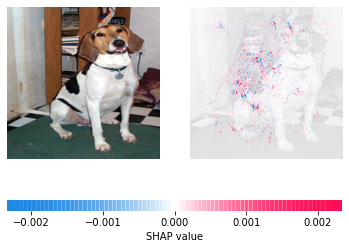

In [142]:
### CODE HERE ###
res = model_cnn.predict(test_image)
pred_lable = int(res >= 0.5) 
print(class_names[pred_lable])
shap.image_plot(shap_values=shap_values[0], pixel_values=test_image[:num_images])

# Task

1. Calculate the shap_values once with the training data and once with the test data and compare the required time
2. Select another test images and run the code again. Pay attention to the time needed when you change the size of the sample.  